<a href="https://colab.research.google.com/github/h8erqqq/ML/blob/main/LW5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Загрузка данных из файла
file_path = '/content/Автомат.xlsx'
data = pd.read_excel(file_path)

# Просмотр первых строк датафрейма для определения структуры данных
data.head()

,Дата,Продано литров,Общая сумма
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,05.08.2023г.,42.0,252.0
3,06.08.2023г.,39.0,234.0
4,07.08.2023г.,45.0,270.0


In [2]:
# Удаление первых двух строк и проверка на наличие других пустых значений
data_clean = data.drop([0, 1]).dropna()

# Преобразование формата даты
data_clean['Дата'] = pd.to_datetime(data_clean['Дата'], format='%d.%m.%Yг.')

# Установка даты в качестве индекса
data_clean.set_index('Дата', inplace=True)

# Проверка результатов обработки
data_clean.head()


,Продано литров,Общая сумма
Дата,,
2023-08-05,42.0,252.0
2023-08-06,39.0,234.0
2023-08-07,45.0,270.0
2023-08-08,60.0,360.0
2023-08-09,26.0,156.0


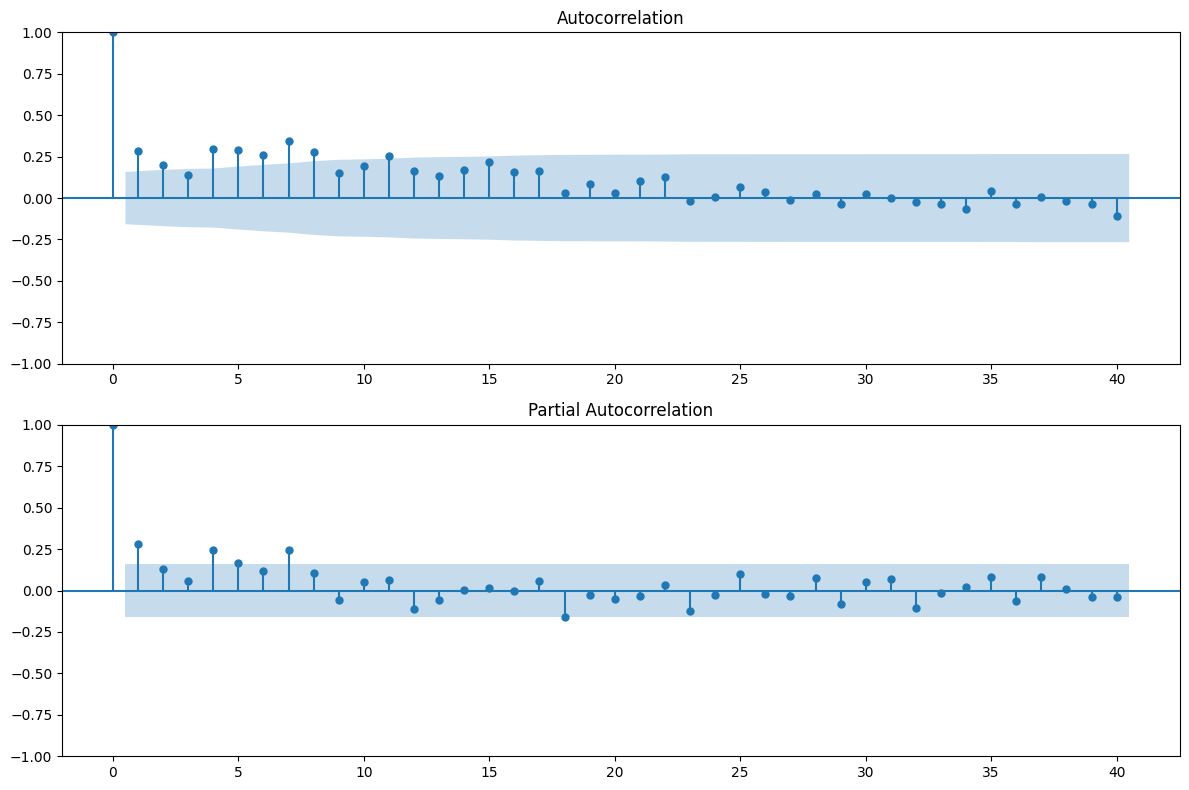

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Выделение ряда "Продано литров"
series = data_clean['Продано литров']

# Построение АКФ и ЧАКФ
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(series, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(series, lags=40, ax=ax[1])
plt.tight_layout()

plt.show()


1. АКФ постепенно уменьшается, что может указывать на наличие авторегрессионной составляющей в данных.
2. ЧАКФ показывает значимые лаги на первых нескольких интервалах, что также может свидетельствовать о наличии авторегрессионного компонента.

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Функция для оценки модели ARIMA и вывода информационных критериев
def evaluate_arima_model(order):
    try:
        model = ARIMA(series, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        bic = model_fit.bic
        return [order, aic, bic]
    except:
        return [order, np.nan, np.nan]

# Определение порядков моделей для оценки
orders = [(1, 0, 0), (2, 0, 0), (0, 0, 1), (0, 0, 2),
          (1, 0, 1), (1, 0, 2), (2, 0, 1)]

# Оценка моделей
model_results = [evaluate_arima_model(order) for order in orders]

# Создание DataFrame для сравнения результатов
results_df = pd.DataFrame(model_results, columns=['Order', 'AIC', 'BIC'])
results_df.sort_values(by='AIC')  # Сортировка по AIC для выбора лучшей модели


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

,Order,AIC,BIC
4,"(1, 0, 1)",1628.665718,1640.813528
6,"(2, 0, 1)",1630.664377,1645.849140
1,"(2, 0, 0)",1646.591273,1658.739084
0,"(1, 0, 0)",1647.477128,1656.587985
3,"(0, 0, 2)",1648.372959,1660.520769
2,"(0, 0, 1)",1650.606913,1659.717770
5,"(1, 0, 2)",1654.606836,1669.791599


На основе информационных критериев AIC и BIC, модель ARMA(1,1) (порядок (1, 0, 1)) является наилучшей среди оцененных. Это соответствует нашим наблюдениям на графиках АКФ и ЧАКФ, где видны признаки как авторегрессионной, так и скользящей средней компоненты.

In [6]:
# Построение и оценка модели ARMA(1,1)
best_model = ARIMA(series, order=(1, 0, 1))
best_model_fit = best_model.fit()

# Вывод результатов модели
best_model_summary = best_model_fit.summary()

# Прогнозирование на 5 периодов вперед
forecast = best_model_fit.forecast(steps=5)

best_model_summary, forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:         Продано литров   No. Observations:                  154
 Model:                 ARIMA(1, 0, 1)   Log Likelihood                -810.333
 Date:                Wed, 17 Jan 2024   AIC                           1628.666
 Time:                        07:04:27   BIC                           1640.814
 Sample:                    08-05-2023   HQIC                          1633.600
                          - 01-05-2024                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        110.2082     22.279      4.947      0.000      66.543     153.873
 ar.L1          0.9804      0.020     49.071      0.000       0.941   

Параметр AR (ar.L1) равен примерно 0.98, что указывает на сильную авторегрессионную зависимость.
Параметр MA (ma.L1) составляет около -0.86, что также указывает на значительный компонент скользящей средней.
Константа (const) приблизительно равна 110.21.
Значения p-value для обоих параметров меньше 0.05, что говорит о статистической значимости коэффициентов.